In [89]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import ast
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import inflect
import seaborn as sns
import spacy
import json





In [2]:
df_interactions_train=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/interactions_test.csv')
df_pp_recipes=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/PP_recipes.csv')
df_pp_users=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/PP_users.csv')
df_RAW_interactions=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/RAW_interactions.csv')
df_RAW_recipes=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/RAW_recipes.csv')


In [3]:
df_pp_recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [4]:
df_pp_recipes[df_pp_recipes.id == 137739 ].ingredient_ids

21993    [7933, 4694, 4795, 3723, 840, 5006, 6270]
Name: ingredient_ids, dtype: object

In [5]:
df_RAW_recipes[df_RAW_recipes.id == 137739].ingredients.values

array(["['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"],
      dtype=object)

In [6]:
df_pp_users.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [7]:
df_RAW_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [8]:
df_interactions_train

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935
...,...,...,...,...,...,...
12450,101053,179011,2009-01-03,5.0,25054,130258
12451,252205,81398,2005-12-26,2.0,25055,152255
12452,624305,142984,2011-01-15,1.0,25057,139864
12453,173575,104842,2004-12-18,3.0,25059,140646


In [9]:
df_RAW_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


# Etude sur les users

In [10]:
df_RAW_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [11]:
N=10
# N utilisateurs avec le plus de review
top_voters=df_RAW_interactions.user_id.value_counts()#.head(N)
top_voters=top_voters.index.values
#print(top_voters)

# Sort la moyenne de notes pour les N utilisateurs avec le plus de reviews données
df_RAW_interactions[df_RAW_interactions['user_id'].isin(top_voters)].groupby('user_id')['rating'].mean()

user_id
1533          4.710938
1535          4.473552
1581          5.000000
1634          3.616667
1676          4.677419
                ...   
2002371755    5.000000
2002371792    4.000000
2002371843    5.000000
2002372464    4.000000
2002372706    5.000000
Name: rating, Length: 226570, dtype: float64

In [12]:
# ETUDE SUR LE POIDS DES USERS DANS LES REVIEWS (COMMENTAIRES)
S=np.sum(np.array(df_RAW_interactions.user_id.value_counts().values))
np.mean(df_RAW_interactions.user_id.value_counts().iloc[:]/S * 100)


np.float64(0.0004413646996513215)

# Etude sur les soumissions de recettes

In [13]:
#preprocessing
df_RAW_recipes.submitted=pd.to_datetime(df_RAW_recipes.submitted)

/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_80598/3734770812.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_80598/3734770812.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_80598/3734770812.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_80598/3734770812.py:8: FutureWarning: 'M' is deprecated and will 

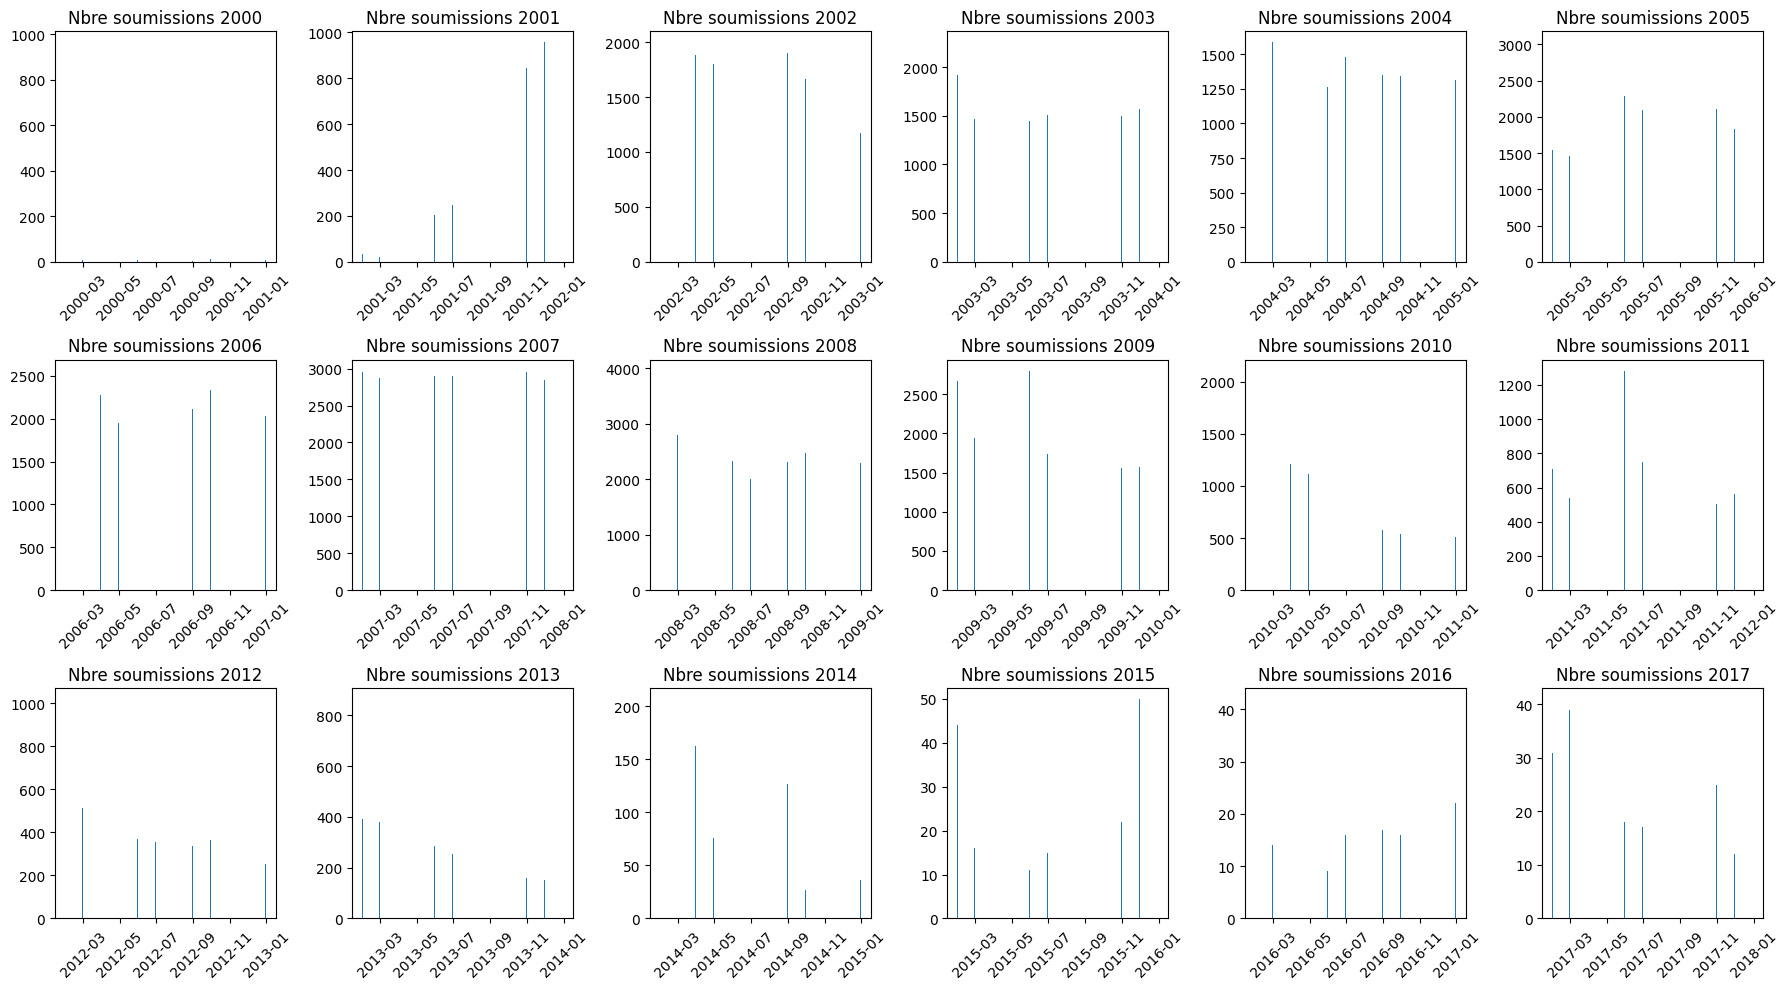

In [14]:
Dico_submitted_date={}
Dico_submitted_count={}

def annual_recipes(*args):
    submitted_counts = df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].submitted.value_counts()
    submitted_counts = submitted_counts.sort_index()
    
    monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
    monthly_counts = monthly_counts.sort_index()

    
    return(monthly_counts.index, monthly_counts.values,submitted_counts)

def plot(annee,index,values):
    plt.figure(figsize=(10, 6))
    plt.bar(index, values)

    plt.xlabel('Dates')
    plt.ylabel('Nombre de soumissions')
    plt.title(f'Nombre de soumissions par date {annee}')
    plt.xticks(rotation=45)
    plt.show()
    
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
                                                                       
for k,i in enumerate(range(2000,2018)):
    row = k//6
    col= k%6
    Dico_submitted_date[i]=annual_recipes(i)[0]
    Dico_submitted_count[i]=annual_recipes(i)[1]
    axes[row,col].bar(Dico_submitted_date[i], Dico_submitted_count[i])
    axes[row,col].set_title(f'Nbre soumissions {i}')
    axes[row,col].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

In [15]:
df_monthly_recipes_count=pd.DataFrame(Dico_submitted_count).T
df_monthly_recipes_count.columns=range(1, 13, 1)
df_monthly_recipes_count.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1213.000000,1029.277778,1141.555556,1120.166667,1203.944444,1039.444444,1030.111111,1024.555556,1011.055556,1037.388889,1013.888889,879.722222
std,1190.732893,969.148189,1003.347704,1082.343060,1093.704900,962.317620,898.469999,992.639217,993.539038,1000.125706,958.209230,849.468055
min,5.000000,8.000000,8.000000,2.000000,7.000000,1.000000,5.000000,5.000000,13.000000,8.000000,12.000000,6.000000
25%,84.750000,69.000000,211.250000,86.000000,84.250000,108.250000,153.500000,172.250000,73.500000,68.000000,75.500000,69.750000
50%,1033.000000,898.000000,1087.000000,861.000000,1275.500000,953.000000,942.500000,553.000000,541.500000,732.000000,799.000000,685.000000
75%,1829.750000,1563.250000,1805.000000,1918.750000,2238.750000,1726.000000,1681.750000,1868.250000,1738.500000,1889.500000,1572.250000,1341.750000
max,3958.000000,2870.000000,2947.000000,3027.000000,2899.000000,2907.000000,2589.000000,2973.000000,2909.000000,2951.000000,2851.000000,2586.000000


# Etude sur les ingredients/saisonnalité 

In [16]:
# On récupère les recettes tokenisées 
df_RAW_recipes_merged=df_RAW_recipes.copy()
df_RAW_recipes_merged=df_RAW_recipes_merged.merge(df_pp_recipes,how='inner',on='id')

In [17]:
df_RAW_recipes_merged[df_RAW_recipes_merged.isna().any(axis=1)] # Verification présence de NaN

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
3,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,28162,"[40480, 7304, 246, 850, 5940, 3033, 40481]","[[5940], [15000, 755, 4914], [4787, 7304, 7524...","[40480, 40482, 23667, 16126, 500, 37588, 40478...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[4717, 7474, 2946, 150]"
5,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6,90348,"[40480, 27593, 282, 755, 4914, 7056, 40481]","[[5317, 7478, 4530, 9021], [5317, 17881], [150...","[40480, 40482, 18777, 9021, 666, 246, 291, 260...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[1397, 1447, 7474, 342, 6858, 7702]"
59,pizza stuffed potato,52443,25,1533,2003-01-28,"['30-minutes-or-less', 'time-to-make', 'course...","[183.3, 12.0, 9.0, 15.0, 21.0, 23.0, 6.0]",8,"['preheat oven to 450 degrees', 'cut potato in...",NaN,"['baking potato', 'mozzarella cheese', 'tomato...",7,56827,"[40480, 6856, 6003, 13995, 40481]","[[15473, 13995], [593, 1648, 37151, 6821], [16...","[40480, 40482, 729, 2525, 10906, 485, 44, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[331, 4836, 7233, 5191, 5108, 3217, 5180]"
77,the woiks dilly burgers,34930,32,23302,2002-07-24,"['bacon', '60-minutes-or-less', 'time-to-make'...","[449.2, 50.0, 16.0, 19.0, 58.0, 67.0, 2.0]",8,"['in a bowl , mix together the ground beef , m...",NaN,"[""mccormick's montreal brand steak seasoning"",...",9,104831,"[40480, 481, 1080, 11, 742, 33691, 18366, 40481]","[[35768, 10394, 535, 35545, 6728, 11892, 29471...","[40480, 40482, 500, 246, 5024, 240, 7087, 1281...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[4821, 2159, 4053, 3543, 298, 112, 4308, 7213,..."
95,20 000 prize winning chili con carne,190,175,115621,1999-08-06,"['weeknight', 'time-to-make', 'course', 'main-...","[558.1, 25.0, 55.0, 41.0, 111.0, 25.0, 12.0]",17,"['in large saucepan or dutch oven , brown half...",NaN,"['lean chuck', 'lean pork', 'onion', 'garlic c...",18,97690,"[40480, 7379, 7397, 9462, 8457, 22942, 8537, 8...","[[4334, 7961], [4334, 12395], [21453], [15022,...","[40480, 40482, 500, 1719, 4835, 39587, 522, 19...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[4187, 4206, 5010, 3203, 821, 7233, 7655, 1329..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178071,zucchini squash rice casserole,41454,71,1533,2002-09-30,"['weeknight', 'time-to-make', 'course', 'main-...","[189.0, 6.0, 26.0, 22.0, 22.0, 9.0, 8.0]",11,"['preheat oven to 350 degrees', 'combine first...",NaN,"['zucchini', 'onion', 'reduced-sodium fat-free...",12,101282,"[40480, 12519, 25, 573, 10825, 23841, 6878, 26...","[[12519, 25, 573, 10825], [21453], [11197, 260...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",0,"[8021, 5010, 1257, 1746, 6654, 1168, 2855, 393..."
178122,zucchini with onions and tomatoes,33602,50,23302,2002-07-08,"['60-minutes-or-less', 'time-to-make', 'course...","[84.4, 5.0, 28.0, 1.0, 6.0, 9.0, 4.0]",5,['melt the butter in a large saucepan and cook...,NaN,"['unsalted butter', 'onion', 'garlic', 'no-sal...",6,51406,"[40480, 12519, 25, 573, 10825, 556, 19414, 488...","[[563, 31331, 8780], [21453], [15022], [664, 2...","[40480, 40482, 9423, 481, 8780, 500, 246, 1719...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7367, 5010, 3184, 2131, 8021, 2757]"
178156,zucchini red pepper leek frittata,41429,65,1533,2002-09-30,"['week

In [18]:
# Convertis les ingrédients en liste 

df_RAW_recipes_merged.ingredients =  df_RAW_recipes_merged.ingredients.apply(lambda x : ast.literal_eval(x) )

In [19]:
# On compte regarde les occurences de chaque ingrédients par mois
# Exemple janvier 2015

X_2015_01=df_RAW_recipes_merged[(df_RAW_recipes_merged['submitted'].dt.year==2015) & (df_RAW_recipes_merged['submitted'].dt.month==1)].ingredients                                                                      

A=[]
for index in range(X_2015_01.shape[0]):
    A+=X_2015_01.iloc[index]

print(len(A),X_2015_01.shape[0])
Counter(A)

134 13


Counter({'onion': 4,
         'water': 4,
         'garlic cloves': 4,
         'salt': 3,
         'olive oil': 3,
         'diced tomatoes': 3,
         'fresh ground black pepper': 3,
         'sea salt': 3,
         'shredded cheddar cheese': 2,
         'vegetable oil': 2,
         'lime zest': 2,
         'coconut oil': 2,
         'garlic powder': 2,
         'red pepper flakes': 2,
         'fresh italian parsley': 2,
         'kosher salt': 2,
         'oil': 2,
         'chicken stock': 2,
         'tomato sauce': 2,
         'ground black pepper': 2,
         'broccoli floret': 1,
         'russet potato': 1,
         'panko breadcrumbs': 1,
         'eggs': 1,
         'black pepper': 1,
         'cayenne pepper': 1,
         'flour': 1,
         'canola oil': 1,
         'salmon fillets': 1,
         'garlic pepper seasoning': 1,
         'honey': 1,
         'fresh lime juice': 1,
         'low sodium soy sauce': 1,
         'fresh cilantro': 1,
         'quinoa': 1,
    

In [20]:
#On refait l'exercice pour toutes les années sur un mois donné
Dico_month_ingredients = {}
for year in range(2000,2018):
    A = []
    X = df_RAW_recipes_merged[(df_RAW_recipes_merged['submitted'].dt.year==year) & (df_RAW_recipes_merged['submitted'].dt.month==1)].ingredients
    for index in range(X.shape[0]):
        A += X.iloc[index]
    Dico_month_ingredients['X_' + str(year)] = Counter(A)                                                                    
    Dico_month_ingredients['X_' + str(year)]['nbre_recipes'] = X.shape[0]
    Dico_month_ingredients['X_' + str(year)]['nbre_ingredients'] = len(A)
    

In [21]:
Dico_month_ingredients['X_2000']

Counter({'nbre_ingredients': 36,
         'nbre_recipes': 5,
         'butter': 3,
         'salt': 2,
         'beer': 2,
         'white bread': 1,
         'smooth peanut butter': 1,
         'banana': 1,
         'cooking oil': 1,
         'yellow onions': 1,
         'leek': 1,
         'corn': 1,
         'red potatoes': 1,
         'jalapeno pepper': 1,
         'cumin': 1,
         'chili powder': 1,
         'creamed corn': 1,
         'milk': 1,
         'fresh thyme': 1,
         'mustard': 1,
         'pepper': 1,
         'velveeta american cheese spread': 1,
         'italian bread': 1,
         'macaroni and cheese mix': 1,
         'cream of mushroom soup': 1,
         'tuna fish': 1,
         'lemon juice': 1,
         'flour': 1,
         'baking powder': 1,
         'sugar': 1,
         'garlic powder': 1,
         'egg': 1,
         'oil': 1,
         'cheddar cheese': 1})

In [22]:
January_Ingredients=pd.DataFrame(Dico_month_ingredients).T
January_Ingredients=January_Ingredients.fillna(0)
January_Ingredients 

,white bread,smooth peanut butter,banana,butter,cooking oil,yellow onions,leek,corn,red potatoes,jalapeno pepper,...,truvia,horseradish mayonnaise,anjou pear,poppy seed filling,lean ground chicken,frozen strawberry daiquiri concentrate,spinach linguine,whole chicken breast,young roasting chickens,coconut aminos
X_2000,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2001,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2002,3.0,1.0,14.0,304.0,17.0,3.0,2.0,8.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2003,3.0,1.0,11.0,409.0,14.0,2.0,8.0,9.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2004,10.0,3.0,5.0,290.0,8.0,1.0,2.0,3.0,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2005,6.0,5.0,10.0,317.0,8.0,10.0,3.0,4.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2006,8.0,1.0,23.0,430.0,11.0,9.0,6.0,11.0,8.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2007,11.0,5.0,32.0,559.0,20.0,3.0,4.0,17.0,18.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2008,12.0,1.0,32.0,739.0,15.0,2.0,4.0,27.0,22.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2009,11.0,2.0,19.0,480.0,11.0,13.0,9.0,19.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
January_Ingredients_Nor=January_Ingredients.copy()
for year in January_Ingredients_Nor.index:
    print(year)
    January_Ingredients_Nor.loc[year]=January_Ingredients_Nor.loc[year]/January_Ingredients.nbre_recipes.loc[year] * 100

X_2000
X_2001
X_2002
X_2003
X_2004
X_2005
X_2006
X_2007
X_2008
X_2009
X_2010
X_2011
X_2012
X_2013
X_2014
X_2015
X_2016
X_2017


In [24]:
January_Ingredients_Nor

,white bread,smooth peanut butter,banana,butter,cooking oil,yellow onions,leek,corn,red potatoes,jalapeno pepper,...,truvia,horseradish mayonnaise,anjou pear,poppy seed filling,lean ground chicken,frozen strawberry daiquiri concentrate,spinach linguine,whole chicken breast,young roasting chickens,coconut aminos
X_2000,20.000000,20.000000,20.000000,60.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2001,0.000000,0.000000,0.000000,26.086957,4.347826,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2002,0.269300,0.089767,1.256732,27.289048,1.526032,0.269300,0.179533,0.718133,0.628366,0.538600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2003,0.191083,0.063694,0.700637,26.050955,0.891720,0.127389,0.509554,0.573248,0.573248,0.445860,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2004,0.803213,0.240964,0.401606,23.293173,0.642570,0.080321,0.160643,0.240964,0.642570,0.642570,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2005,0.479616,0.399680,0.799361,25.339728,0.639488,0.799361,0.239808,0.319744,0.799361,0.479616,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2006,0.437637,0.054705,1.258206,23.522976,0.601751,0.492341,0.328228,0.601751,0.437637,0.547046,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2007,0.468883,0.213129,1.364024,23.827792,0.852515,0.127877,0.170503,0.724638,0.767263,0.937766,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2008,0.391773,0.032648,1.044727,24.126673,0.489716,0.065295,0.130591,0.881489,0.718250,0.391773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
X_2009,0.548902,0.099800,0.948104,23.952096,0.548902,0.648703,0.449102,0.948104,0.299401,0.449102,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
January_Ingredients_Nor.describe()


,white bread,smooth peanut butter,banana,butter,cooking oil,yellow onions,leek,corn,red potatoes,jalapeno pepper,...,truvia,horseradish mayonnaise,anjou pear,poppy seed filling,lean ground chicken,frozen strawberry daiquiri concentrate,spinach linguine,whole chicken breast,young roasting chickens,coconut aminos
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.459124,1.217448,1.754004,24.264494,1.842276,1.335821,1.300156,2.595366,2.051645,1.641218,...,0.047483,0.047483,0.047483,0.047483,0.047483,0.047483,0.427350,0.427350,0.427350,0.925926
std,4.635006,4.689066,4.583114,10.778703,4.636690,4.664785,4.670788,5.771670,4.793221,4.604029,...,0.201455,0.201455,0.201455,0.201455,0.201455,0.201455,1.813094,1.813094,1.813094,3.928371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209450,0.000000,0.100402,22.669226,0.429177,0.016324,0.000000,0.338233,0.471540,0.396079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.401349,0.076730,0.775620,23.889944,0.575326,0.152122,0.175018,0.665815,0.680410,0.509108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.531581,0.234005,1.203731,25.254796,0.881919,0.467681,0.418883,0.988906,0.840866,0.891295,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,20.000000,20.000000,60.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,0.854701,0.854701,0.854701,0.854701,0.854701,0.854701,7.692308,7.692308,7.692308,16.666667


In [26]:
N_recipes_Jan  =  int(January_Ingredients.sum().loc['nbre_recipes'])
print('nombre de recette publiées en Janvier =',N_recipes_Jan)

nombre de recette publiées en Janvier = 16865


In [27]:
January_Ingredients_All=pd.DataFrame(January_Ingredients.sum())

January_Ingredients_All=January_Ingredients_All.reset_index()
January_Ingredients_All.columns=['ingredients','apperences']                                                                    
January_Ingredients_All['freq'] = January_Ingredients_All['apperences'] / January_Ingredients.sum().loc['nbre_recipes'] *100        #Fréquence (%) d'apparition d'un ingrédients en Janvier

January_Ingredients_All=January_Ingredients_All.sort_values(by='freq',ascending=False)

January_Ingredients_All

,ingredients,apperences,freq
33,nbre_ingredients,153802.0,911.959680
32,nbre_recipes,16865.0,100.000000
17,salt,6313.0,37.432553
3,butter,4076.0,24.168396
35,onion,3274.0,19.412985
...,...,...,...
4401,jalapeno cheddar cheese,1.0,0.005929
4403,baby tomatoes,1.0,0.005929
4405,spinach ravioli,1.0,0.005929
4408,cake decorating gel,1.0,0.005929


In [28]:
January_Ingredients_All['freq_int']=January_Ingredients_All['freq'].apply(lambda x : int(x))
January_Ingredients_All


,ingredients,apperences,freq,freq_int
33,nbre_ingredients,153802.0,911.959680,911
32,nbre_recipes,16865.0,100.000000,100
17,salt,6313.0,37.432553,37
3,butter,4076.0,24.168396,24
35,onion,3274.0,19.412985,19
...,...,...,...,...
4401,jalapeno cheddar cheese,1.0,0.005929,0
4403,baby tomatoes,1.0,0.005929,0
4405,spinach ravioli,1.0,0.005929,0
4408,cake decorating gel,1.0,0.005929,0


Text(0.5, 1.0, "Frequence cumulative des fréquences d'apparition des ingrédients")

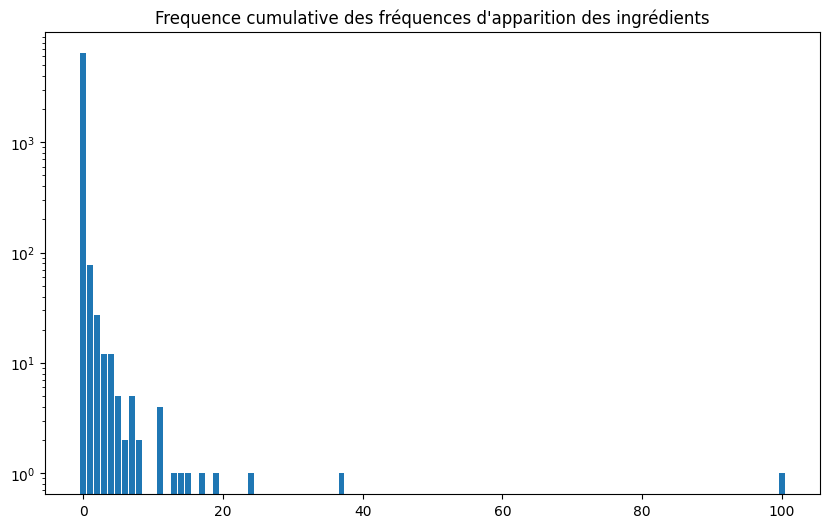

In [29]:
Jan_Ingr_freq_count=January_Ingredients_All.freq_int.value_counts()# Ici on veut connaitre la distribution des fréquences d'apparition pour éliminer les ingrédients qui apparaissent trop souvent
Jan_Ingr_freq_count=Jan_Ingr_freq_count.drop(index=911)
plt.figure(figsize=(10, 6))
plt.bar(Jan_Ingr_freq_count.index, Jan_Ingr_freq_count.values)
plt.yscale("log")
plt.title("Frequence cumulative des fréquences d'apparition des ingrédients")

Suppréssion des outliers : premier test avec les ingrédients présent dans moins de 1% des recettes de Janvier

In [30]:
nlp = spacy.load("en_core_web_sm")



/Users/ramzi/Library/Caches/pypoetry/virtualenvs/etude-app-cuisine-pmmUL2vP-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/ramzi/Library/Caches/pypoetry/virtualenvs/etude-app-cuisine-pmmUL2vP-py3.10/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/ramzi/Library/Caches/pypoetry/virtualenvs/etude-app-cuisine-pmmUL2vP-py3.10/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [31]:
January_Ingredients_All[(January_Ingredients_All['freq']>1) & (January_Ingredients_All['freq']<3 )]

,ingredients,apperences,freq,freq_int
308,parsley,505.0,2.994367,2
385,unsalted butter,499.0,2.958790,2
152,ground beef,498.0,2.952861,2
454,cayenne pepper,487.0,2.887637,2
329,ground cumin,483.0,2.863919,2
...,...,...,...,...
750,whipping cream,173.0,1.025793,1
265,boiling water,173.0,1.025793,1
163,boneless skinless chicken breast halves,173.0,1.025793,1
171,confectioners' sugar,171.0,1.013934,1


In [32]:
Valuable_ingredient_Jan=January_Ingredients_All[January_Ingredients_All['freq']<1].copy()
Valuable_ingredient_Jan['ingredient_tf']=Valuable_ingredient_Jan['ingredients'].apply(lambda x : str(nlp(x)).split()[-1])


In [33]:
Valuable_ingredient_Jan_shorted={}

# On récupère réduit chaque ingrédient à son dernier et compte les occurences des nouveaux ingrédients

for ingredient in Valuable_ingredient_Jan.ingredient_tf.drop_duplicates().values: 
    Valuable_ingredient_Jan_shorted[ingredient]={'apperences': int(Valuable_ingredient_Jan[Valuable_ingredient_Jan['ingredient_tf']==ingredient].apperences.sum()),
                                                 'freq'      :  Valuable_ingredient_Jan[Valuable_ingredient_Jan['ingredient_tf']==ingredient].freq.sum()      }

# On récupère que les valeurs avec plus d'un apparition et moins de 1000

Valuable_ingredient_Jan_shorted=pd.DataFrame(Valuable_ingredient_Jan_shorted).T.sort_values(by='freq',ascending=False)
Valuable_ingredient_Jan_shorted[(Valuable_ingredient_Jan_shorted['apperences']<1000) & (Valuable_ingredient_Jan_shorted['apperences']>1)]
    

,apperences,freq
beans,963.0,5.710050
tomatoes,808.0,4.790987
rice,804.0,4.767269
cream,765.0,4.536021
juice,762.0,4.518233
...,...,...
lobster,2.0,0.011859
frisee,2.0,0.011859
marzipan,2.0,0.011859
cracklings,2.0,0.011859


Cas générale

In [34]:
p = inflect.engine()

In [ ]:
def create_monthly_dico_ingredient(month : int):
    df = {}
    for year in range(2000,2018):
        A = []
        X = df_RAW_recipes_merged[(df_RAW_recipes_merged['submitted'].dt.year==year) & (df_RAW_recipes_merged['submitted'].dt.month==month)].ingredients
        for index in range(X.shape[0]):
            A += X.iloc[index]
        df['X_' + str(year)] = Counter(A)                                                                    
        df['X_' + str(year)]['nbre_recipes'] = X.shape[0]
        df['X_' + str(year)]['nbre_ingredients'] = len(A)
        
    Month_Ingredients=pd.DataFrame(df).T
    Month_Ingredients=Month_Ingredients.fillna(0)
    Month_Ingredients
    
    return Month_Ingredients

def count_ingredients(df_ingredient : pd.DataFrame):
    df_ingredient_all=pd.DataFrame(df_ingredient.sum())

    df_ingredient_all=df_ingredient_all.reset_index()
    df_ingredient_all.columns=['ingredients','apperences']                                                                    
    df_ingredient_all['freq'] = df_ingredient_all['apperences'] / df_ingredient.sum().loc['nbre_recipes'] *100        #Fréquence (%) d'apparition d'un ingrédients en Janvier

    df_ingredient_all=df_ingredient_all.sort_values(by='freq',ascending=False)

    return df_ingredient_all

def plural_to_singular(word):
    # Crée un objet inflect pour la conversion
    p = inflect.engine()
    # Utilise la fonction singular_noun pour convertir en singulier
    singular_word = p.singular_noun(word)
    # Retourne le mot converti ou le mot original si aucun singulier trouvé
    return singular_word if singular_word else word

def lemmetize_and_sort(df_ingredient_all):
    
    df_ingredient_all['ingredient_tf']=df_ingredient_all['ingredients'].apply(lambda x : plural_to_singular( str(nlp(x)).split()[-1])) # On lemmatise et met au singulier
    Valuable_ingredient_shorted={}

    # On récupère réduit chaque ingrédient à son dernier mot et compte les occurences des nouveaux ingrédients
    # mapper les nouveaux ingrédients avec les anciens
    for ingredient in df_ingredient_all.ingredient_tf.drop_duplicates().values: 
        Valuable_ingredient_shorted[ingredient]={'apperences': int(df_ingredient_all[df_ingredient_all['ingredient_tf']==ingredient].apperences.sum()),
                                                    'freq'      :  df_ingredient_all[df_ingredient_all['ingredient_tf']==ingredient].freq.sum()      }

    # On récupère que les valeurs avec plus d'un apparition et moins de 1000

    Valuable_ingredient_shorted=pd.DataFrame(Valuable_ingredient_shorted).T.sort_values(by='freq',ascending=False)
    Valuable_ingredient_shorted[(Valuable_ingredient_shorted['apperences']<1000) & (Valuable_ingredient_shorted['apperences']>1)]
    
    return Valuable_ingredient_shorted

def mapping():
    Mapping_ingredients={}
    for i in range(1,13):
        list_ingredient=create_monthly_dico_ingredient(i).columns.values
        for x in list_ingredient:
            token = plural_to_singular( str(nlp(x)).split()[-1])
            if x not in Mapping_ingredients.keys():
                Mapping_ingredients[x] = token
            else:
                continue
    return Mapping_ingredients

In [ ]:
mapping_ingredinent = mapping()      

white bread
smooth peanut butter
banana
butter
cooking oil
yellow onions
leek
corn
red potatoes
jalapeno pepper
cumin
chili powder
creamed corn
milk
fresh thyme
mustard
pepper
salt
beer
velveeta american cheese spread
italian bread
macaroni and cheese mix
cream of mushroom soup
tuna fish
lemon juice
flour
baking powder
sugar
garlic powder
egg
oil
cheddar cheese
nbre_recipes
nbre_ingredients
celery
onion
ground pork
soy sauce
beef broth
hamburger buns
margarine
egg substitute
light cream
1% low-fat milk
fresh mushrooms
cheese spread
ground black pepper
ritz cracker
penne pasta
asparagus
chicken stock
salt and pepper
ricotta cheese
olive oil
parmesan cheese
eggs
mayonnaise
fresh horseradish
fresh lemon juice
black pepper
tart green apples
roast beef
arugula
elbow macaroni
lean hamburger
spanish onion
garlic
whole tomatoes
campbell's cheddar cheese soup
baking soda
vanilla
cinnamon
corn oil
chicken
chicken breasts
corn tortillas
green enchilada sauce
monterey jack pepper cheese
monterey j

In [61]:
create_monthly_dico_ingredient(1).columns.values

array(['white bread', 'smooth peanut butter', 'banana', ...,
       'whole chicken breast', 'young roasting chickens',
       'coconut aminos'], dtype=object)

In [36]:
lemmetize_and_sort(count_ingredients(create_monthly_dico_ingredient(3))) # les fréquences sont en %

# Next step : visualisation + streamlit 

,apperences,freq
nbre_ingredient,143712.0,900.789771
nbre_recipe,15954.0,100.000000
pepper,8144.0,51.046759
salt,7089.0,44.433998
sugar,6029.0,37.789896
...,...,...
glycerine,1.0,0.006268
chaiman,1.0,0.006268
crispbread,1.0,0.006268
jackfruit,1.0,0.006268


In [37]:
dico_all_month_ingredient={}
for month in range(1,13):
    dico_all_month_ingredient[month]=lemmetize_and_sort(count_ingredients(create_monthly_dico_ingredient(month)))



In [ ]:
# Sauvegarder les fichiers en local

'/Users/ramzi/Documents/Telecom_Master/Kit Big Data/projet_analyse_cuisine/etude_app_cuisine/tests/data' 

for month in range(1,13):
    dico_all_month_ingredient[month].to_csv(f'/Users/ramzi/Documents/Telecom_Master/Kit Big Data/projet_analyse_cuisine/etude_app_cuisine/tests/data/dico_all_month_ingredient{month}.csv')


In [ ]:
# Sauvegarder la table de mapping
with open("/Users/ramzi/Documents/Telecom_Master/Kit Big Data/projet_analyse_cuisine/etude_app_cuisine/tests/data/mapping_ingredient.json", "w", encoding="utf-8") as fichier:
    json.dump(mapping_ingredinent, fichier, ensure_ascii=False, indent=4)

In [39]:
dico_all_month_ingredient[month]

,apperences,freq
nbre_ingredient,106870.0,888.657908
nbre_recipe,12026.0,100.000000
salt,5393.0,44.844504
pepper,5372.0,44.669882
sugar,5239.0,43.563945
...,...,...
breadstick,1.0,0.008315
custard,1.0,0.008315
peri-peri,1.0,0.008315
twine,1.0,0.008315


pepper     53.507264
salt       45.057812
onion      36.697302
oil        35.469908
sugar      35.226801
cheese     34.977765
butter     29.404091
flour      23.883783
powder     22.739401
sauce      21.678031
egg        21.606878
water      19.211385
clove      18.470205
milk       18.215239
juice      15.238660
tomato     12.932108
cream      12.629706
garlic      9.593833
vinegar     8.852653
broth       8.615476
Name: freq, dtype: float64
pepper      53.264460
salt        43.727599
sugar       37.163539
onion       35.497927
oil         35.209783
cheese      34.724858
butter      29.833439
flour       24.344648
egg         22.763371
powder      22.151943
sauce       21.364818
water       18.834774
milk        17.942231
clove       17.548668
juice       15.566800
cream       13.669267
tomato      12.579942
garlic       9.586057
vinegar      9.185466
cinnamon     8.236700
Name: freq, dtype: float64
pepper     51.046759
salt       44.433998
sugar      37.789896
oil        34.630814
on

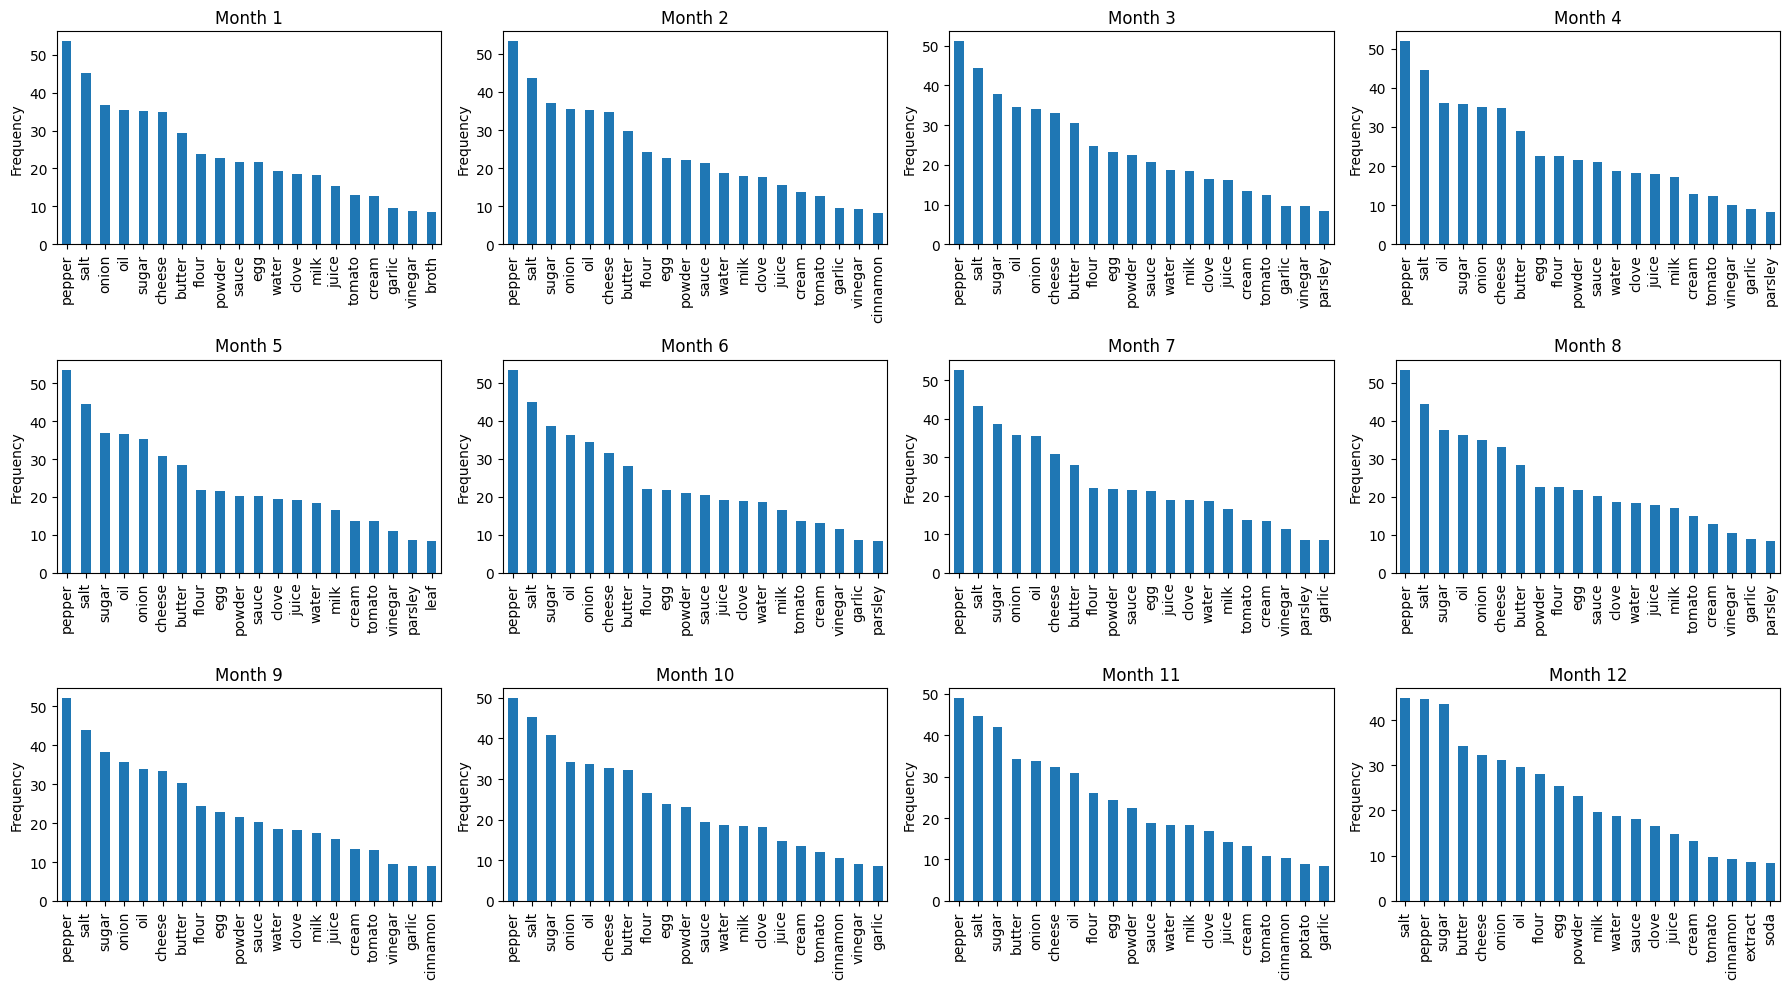

In [40]:
top = 20
top += 2
fig, axes = plt.subplots(3, 4, figsize=(18, 10))  # Adjusted to (3, 4) for 12 months

for month in range(1, 13):
    # Calculate the position in the subplot grid
    row = (month - 1) // 4
    col = (month - 1) % 4
    
    # Accessing frequency data and plotting on the specified subplot
    freq_data = dico_all_month_ingredient[month].iloc[2:top].freq
    print(freq_data)
    freq_data.plot(kind='bar', stacked=True, ax=axes[row, col])
    
    # Optional: Add title or labels for each subplot
    axes[row, col].set_title(f"Month {month}")
    axes[row, col].set_ylabel("Frequency")

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()


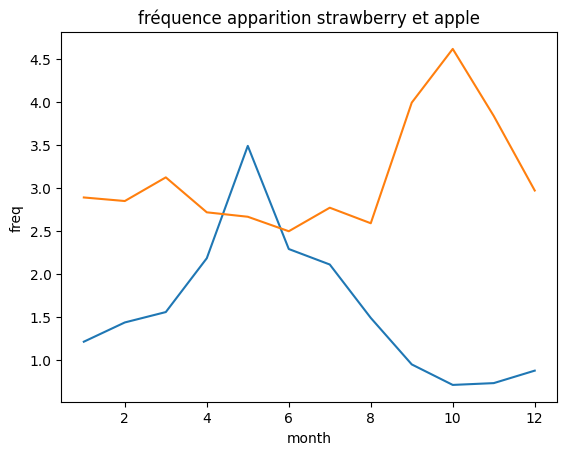

In [41]:
# Input = ingredient , Output = courbe de la fréquence de l'ingrédient
input_1,input_2 = 'strawberry','apple'
output_1,output_2=[],[]
for month in range(1,13):
    output_1.append(dico_all_month_ingredient[month].loc[input_1].freq)
    output_2.append(dico_all_month_ingredient[month].loc[input_2].freq)


plt.title('fréquence apparition ' + input_1 + ' et ' +input_2) 
#plt.ylim(0, 50) # je veux une échelle de de 0 à 50 %
plt.xlabel('month')
plt.ylabel('freq')
plt.plot(range(1,13),output_1)
plt.plot(range(1,13),output_2)


In [42]:
dico_all_month_ingredient[month].loc[input_1].freq

np.float64(0.8731082654249126)

In [43]:
def is_seasonal(ingredient,season):
    S=["January" ,"February" ,"March" ,"April" ,"May" ,"June" "July" ,"August" ,"September" ,"October","November" ,"December" ]
    best_season=0
    c=0                                                     #Comparateur des fréquences entre saison
    for month in range(1,13):
        dico_all_month_ingredient[month].loc[ingredient].freq
        if c > dico_all_month_ingredient[month].loc[ingredient].freq:
            continue
        else :
            c= dico_all_month_ingredient[month].loc[ingredient].freq
            best_season=month
    if c == 0:
        return('Your ingredient is not in our database')
    elif season == best_season:
        return ('Good choice,the best season to cook ' + ingredient + ' is ' +S[int(best_season)-1])
    else :
        return('You should cook ' + ingredient + ' in '+ S[int(best_season)-1] )

In [44]:
is_seasonal(input_1,1)

'You should cook strawberry in May'

Text(0.5, 1.0, 'Corrélogramme entre Série X et Série Y')

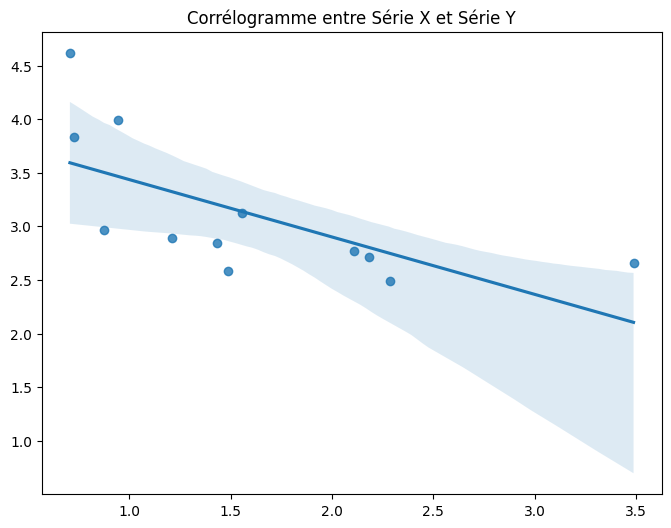

In [45]:
np.corrcoef(output_1, output_2)

plt.figure(figsize=(8, 6))
sns.regplot(x=output_1, y=output_2)
plt.title("Corrélogramme entre Série X et Série Y")

# New feature: 
Input : ingrédients , 
Output: liste des 3 ingrédients qui se marient le mieux avec cette ingrédients sur la saison / liste des recettes 

<Axes: >

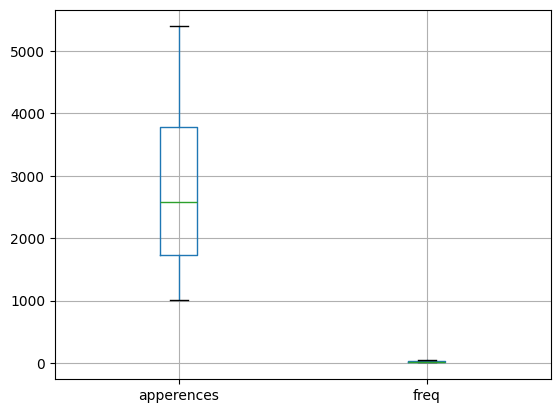

In [46]:
dico_all_month_ingredient[month].iloc[2:top].boxplot()

<Axes: xlabel='apperences'>

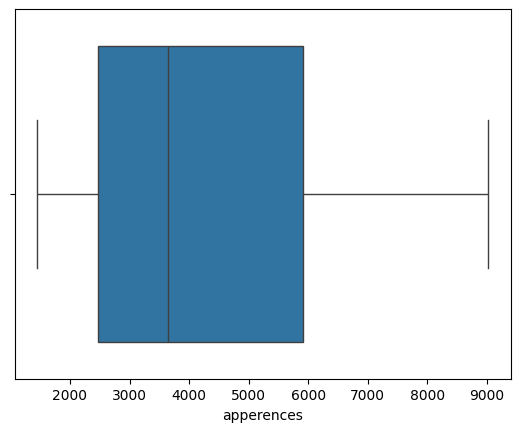

In [47]:
sns.boxplot(x='apperences', data=dico_all_month_ingredient[1].iloc[2:top])

In [48]:
dico_all_month_ingredient[month].apperences

nbre_ingredient    106870.0
nbre_recipe         12026.0
salt                 5393.0
pepper               5372.0
sugar                5239.0
                     ...   
breadstick              1.0
custard                 1.0
peri-peri               1.0
twine                   1.0
jowl                    1.0
Name: apperences, Length: 881, dtype: float64

In [49]:
def top_ingredients_matches(ingredient,season,n):
    dico_all_month_ingredient[month].loc[input_1].freq

In [50]:
#test 
def is_seasonal_1(ingredient,season,dico_all_month_ingredient):
    S=["January" ,"February" ,"March" ,"April" ,"May" ,"June" "July" ,"August" ,"September" ,"October","November" ,"December" ]
    best_season=0
    c=0                                                     #Comparateur des fréquences entre saison
    for month in range(1,13):
        dico_all_month_ingredient[month].loc[ingredient].freq
        if c > dico_all_month_ingredient[month].loc[ingredient].freq:
            continue
        else :
            c= dico_all_month_ingredient[month].loc[ingredient].freq
            best_season=month
    if c == 0:
        return('Your ingredient is not in our database')
    elif season == best_season:
        return ('Good choice,the best season to cook ' + ingredient + ' is ' +S[int(best_season)-1])
    else :
        return('You should cook ' + ingredient + ' in '+ S[int(best_season)-1] )
    

dico_all_month_ingredient_test = {}
chemin = '/Users/ramzi/Documents/Telecom_Master/Kit Big Data/projet_analyse_cuisine/etude_app_cuisine/tests/data/dico_all_month_ingredient'

for i in range(1, 13):
    # Lecture du CSV en gardant l'ordre d'origine
    dico_all_month_ingredient_test[i] = pd.read_csv(chemin + str(i) + '.csv')
    dico_all_month_ingredient_test[i].columns = [ 'ingrédients','apparences', 'freq']
    dico_all_month_ingredient_test[i] = dico_all_month_ingredient_test[i].set_index('ingrédients')
    dico_all_month_ingredient_test[i].index.name = None  

    


<Axes: xlabel='apperences'>

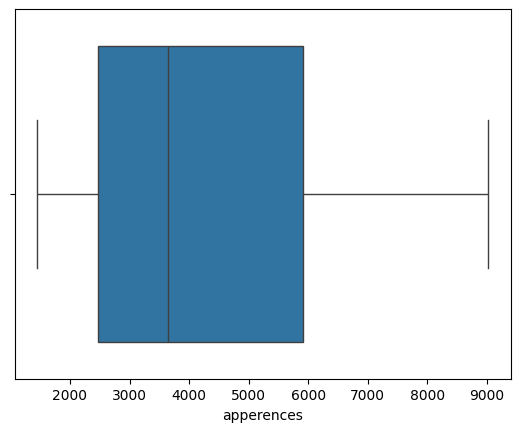

In [51]:
sns.boxplot(x='apperences', data=dico_all_month_ingredient[1].iloc[2:top])

On va retirer les ingrédients qui on une variance faible sur les 12 mois et conserver uniquement les ingrédients avec une variance élevée, ces ingrédients seront alors de saison

In [52]:
# Peut être faudrait-il utiliser l'entropie à la place de l'écart type , car l'écart type dépend peut être un peu trop de la moyenne 
# Si moyenne haute alors écart type plus haut donc dispertion pas pénalisé autant que pour les moyennes basses
# Il faudrait regrouper la liste des tous les ingrédients , faire un  try execpt si ingrédient pas présent dans un mois
# Cette fonction faire l'objet demande spécifique de l'utilisateur 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize

ip1='milk'
ip2='speculaa'

def ingredient_std(ingredient):
    ingredient_values=[]

    for i in range(1,13):
        if ingredient in dico_all_month_ingredient[i].index:
            ingredient_values.append(dico_all_month_ingredient[i].loc[ingredient].freq)
        else:
            continue
    
    if len(ingredient_values) >0:
        N=len(ingredient_values)
        ingredient_values =  np.array(ingredient_values)
        sigma_ingredient= np.var(ingredient_values)
        
        
        ingredient_values_norm= normalize(ingredient_values.reshape(N,1), norm='max', axis=0)
        sigma_norm = np.var(ingredient_values_norm) 

        
        return ingredient_values_norm,[np.sqrt(sigma_norm.reshape(-1).item()),N]
    else:
        return 0,0


        
    
print("std :")
ingredient_std(ip1)[1],ingredient_std(ip2)[1]

std :


([np.float64(0.0483523801299309), 12], [np.float64(0.0), 1])

In [53]:
def merge_list(listes):
    fusion_set = set()
    for liste in listes:
        fusion_set.update(liste)
    return list(fusion_set)

All_ingredient=[]

for i in range(1,13):
    All_ingredient.append(dico_all_month_ingredient[i].iloc[2:].index.values)
    
#merge_list(All_ingredient)

In [54]:
dico_ingredient_std={}
for ingredient in merge_list(All_ingredient):
    dico_ingredient_std[ingredient] = ingredient_std(ingredient)[1]

In [55]:
df_std_ingredient=pd.DataFrame(dico_ingredient_std).T # Les valeurs nulles sont donc celles pour les ingrédients présents que dans un mois 
df_std_ingredient.columns=['std','month_count']
df_std_ingredient.month_count = df_std_ingredient.month_count.apply(lambda x : int(x))
df_std_ingredient

,std,month_count
rapadura,0.000000,1
amaretto,0.164457,12
pumpkin,0.249878,12
raisin,0.067186,12
tablet,0.000000,1
...,...,...
powder,0.035261,12
gnocchi,0.220290,12
charcoal,0.055396,5
sole,0.261109,12


# ingredient qui match le plus par saison

In [ ]:
# Fonction qui tokenise les ingrédients selon le mapping créé en amont
def tokenised_recipe (string):
    L=[]
    for x in Counter(string).keys():
        try : 
            L.append(mapping_ingredinent[x])
        except KeyError:
            continue
    return L

winter squash => squash
mexican seasoning => seasoning
mixed spice => spice
honey => honey
butter => butter
olive oil => oil
salt => salt


In [125]:
tokenised_recipe(df_RAW_recipes_merged.ingredients.iloc[178264])

['egg',
 'mayonnaise',
 'mustard',
 'seasoning',
 'sauce',
 'salt',
 'pepper',
 'parsley']

In [ ]:
# Copie et tokenisation de la colonne ingredients , peut faudrait conserver une copie des ingrédients de bases(utils pour la recommandation de recettes)
df_recipes_tokenised=df_RAW_recipes_merged.copy()
df_recipes_tokenised.ingredients=df_recipes_tokenised.ingredients.apply(lambda x: tokenised_recipe(x) )


In [ ]:
def check_elements_in_list(elements, lst):
    # Convertir la liste en set pour des recherches rapides
    lst_set = set(lst)
    # Vérifier si tous les éléments sont dans le set
    return all(el in lst_set for el in elements)
my_list = [1, 2, 3, 4, 5, 6]
elements_to_check = [2, 4, 6]

# Fonnction qui renvoie un dictionnaire des ingrédients qui sont le plus souvent associés à notre ingrédient témoin
def ingredient_match(ing,month):
    match=[]
    c=0
    for recipe in df_recipes_tokenised[(df_recipes_tokenised['submitted'].dt.month==month)].ingredients:
        if ing in recipe:
            c+=1
            for ingredient_recipe in recipe:
                match.append(ingredient_recipe)
        else:
            continue   
    return Counter(match)

ingredient_match('strawberry',5)

# Fonction qui prend en entrée une liste d'ingrédient et un mois  et qui renvoie la la liste des recette qui associe l'ensemble des ingrédients de la liste pour le mois donné
def recipes_filter_by_ingredients(List_ingredient,month):
    match_recipes=[]
    for index,recipe in enumerate(df_recipes_tokenised[(df_recipes_tokenised['submitted'].dt.month==month)].ingredients):
        if check_elements_in_list(List_ingredient,recipe) == True:
           match_recipes.append(int(df_recipes_tokenised[(df_recipes_tokenised['submitted'].dt.month==month)].ingredients.index[index]))
        else:
            continue
    return match_recipes

recipes_filter_by_ingredients(['strawberry','sugar'],5)


[398,
 2593,
 3410,
 3896,
 3897,
 3901,
 6470,
 8152,
 10248,
 10258,
 12300,
 12307,
 12309,
 12417,
 13235,
 14662,
 14663,
 16851,
 16906,
 16913,
 16918,
 16936,
 16979,
 16980,
 16988,
 16992,
 17028,
 17734,
 17896,
 18012,
 19074,
 19274,
 21840,
 23119,
 23468,
 24262,
 26981,
 27773,
 30732,
 33287,
 36172,
 36856,
 37180,
 37492,
 39023,
 39055,
 39924,
 39925,
 40158,
 41413,
 41438,
 41846,
 42000,
 42274,
 42626,
 44056,
 46449,
 47394,
 49776,
 49805,
 49849,
 53718,
 57215,
 57391,
 57805,
 59149,
 60487,
 60490,
 60495,
 61919,
 63328,
 63450,
 65619,
 65664,
 65686,
 66919,
 67074,
 67075,
 67079,
 67087,
 67098,
 67102,
 67372,
 67378,
 67379,
 67381,
 67382,
 67383,
 67384,
 67390,
 67394,
 67403,
 67405,
 67409,
 67862,
 68124,
 68157,
 68219,
 68480,
 68490,
 68503,
 68522,
 68586,
 68612,
 68766,
 69177,
 70505,
 72829,
 73250,
 78018,
 80915,
 82674,
 84829,
 88810,
 89267,
 89501,
 89707,
 90320,
 90430,
 91301,
 91303,
 91304,
 91366,
 95361,
 96358,
 99999,
 

In [180]:
df_recipes_tokenised.iloc[398]

name                    real  strawberry pie with french cream topping
id                                                              368878
minutes                                                             45
contributor_id                                                  213909
submitted                                          2009-05-01 00:00:00
tags                 ['60-minutes-or-less', 'time-to-make', 'course...
nutrition                 [591.2, 48.0, 201.0, 10.0, 12.0, 78.0, 25.0]
n_steps                                                             14
steps                ['cook frozen berries in large saucepan over m...
description          this is the most wonderful strawberry pie with...
ingredients          [strawberry, juice, water, gelatin, sugar, sal...
n_ingredients                                                       11
i                                                                 7710
name_tokens          [40480, 1582, 13731, 7056, 556, 4413, 4914, 31...
ingred